# **01. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip3 install scikit-optimize

     |████████████████████████████████| 101 kB 3.9 MB/s 


In [ ]:
!pip install xgboost
!pip install catboost

     |████████████████████████████████| 69.2 MB 5.4 kB/s 


#**02. Upload Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bike_model1.csv to bike_model1.csv
Saving bike_model2.csv to bike_model2.csv
Saving bike_testing1.csv to bike_testing1.csv
Saving bike_testing2.csv to bike_testing2.csv


In [ ]:
bike_model1 = pd.read_csv('bike_model1.csv')
bike_testing1 = pd.read_csv('bike_testing1.csv')
bike_model2 = pd.read_csv('bike_model2.csv')
bike_testing2 = pd.read_csv('bike_testing2.csv')

In [ ]:
bike_model1.isnull().sum()

temp                            0
humidity                        0
windspeed                       0
count                           0
year                            0
month                           0
day                             0
hr                              0
season_Fall                     0
season_Spring                   0
season_Summer                   0
season_Winter                   0
is_holiday_No                   0
is_holiday_Yes                  0
is_workingday_No                0
is_workingday_Yes               0
weather_condition_Clear         0
weather_condition_Cloudy        0
weather_condition_Heavy Rain    0
weather_condition_Light Rain    0
dtype: int64

In [ ]:
bike_model1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   temp                          16637 non-null  float64
 1   humidity                      16637 non-null  float64
 2   windspeed                     16637 non-null  float64
 3   count                         16637 non-null  int64  
 4   year                          16637 non-null  int64  
 5   month                         16637 non-null  int64  
 6   day                           16637 non-null  int64  
 7   hr                            16637 non-null  int64  
 8   season_Fall                   16637 non-null  int64  
 9   season_Spring                 16637 non-null  int64  
 10  season_Summer                 16637 non-null  int64  
 11  season_Winter                 16637 non-null  int64  
 12  is_holiday_No                 16637 non-null  int64  
 13  i

In [ ]:
bike_model1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,16637.0,20.694539,7.887134,0.82,13.9400,21.320,27.0600,41.0000
humidity,16637.0,62.475567,19.322707,0.00,47.0000,62.000,78.0000,100.0000
windspeed,16637.0,12.750740,8.168317,0.00,7.0015,12.998,16.9979,56.9969
count,16637.0,190.477009,182.026755,1.00,41.0000,143.000,282.0000,977.0000
year,16637.0,0.480375,0.499630,0.00,0.0000,0.000,1.0000,1.0000
month,16637.0,6.294164,3.310969,1.00,3.0000,6.000,9.0000,12.0000
day,16637.0,15.670313,8.782122,1.00,8.0000,16.000,23.0000,31.0000
hr,16637.0,11.547875,6.914199,0.00,6.0000,12.000,18.0000,23.0000
season_Fall,16637.0,0.270241,0.444098,0.00,0.0000,0.000,1.0000,1.0000
season_Spring,16637.0,0.239226,0.426624,0.00,0.0000,0.000,0.0000,1.0000


#**03. Data Spliting**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train = bike_model1.drop(columns=['count'])
y_train = bike_model1['count']
X_test = bike_testing1.drop(columns=['count'])
y_test = bike_testing1['count']

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
#print('X Train Shape',X_train.shape,)
#print('y Train Shape',y_train.shape,)

X Train Shape (11645, 19)
y Train Shape (11645,)


In [ ]:
#print('X Test Shape',X_test.shape,)
#print('y Test Shape',y_test.shape,)

X Test Shape (4992, 19)
y Test Shape (4992,)


# **04. Modeling**

### Machine Learning Regressor

* Linear Regression
* XGBoost
* Random Forrest
* CatBoost

In [ ]:
from sklearn.linear_model import  LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

### Metrics/scoring

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#### Training and Test Model

In [ ]:
models=[LinearRegression(),XGBRegressor(random_state=123),RandomForestRegressor(random_state=123),CatBoostRegressor(random_state=123)]
model_names=['Linear Regresion','XGBRegressor','RandomForestRegressor','CatBoost']
rmse_train=[]
r2_train=[]
mae_train=[]
rmse_test=[]
r2_test=[]
mae_test=[]
d={}

for model in range (len(models)):
    reg=models[model]
    reg.fit(X_train,y_train)
    y_pred_train=reg.predict(X_train)
    
    #obtaining scoring for training
    rmse_train.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    r2_train.append(r2_score(y_train,y_pred_train))
    mae_train.append(mean_absolute_error(y_train,y_pred_train))

    #obtaining scoring for training
    y_pred_test=reg.predict(X_test)

    rmse_test.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
    r2_test.append(r2_score(y_test,y_pred_test))
    mae_test.append(mean_absolute_error(y_test,y_pred_test))


d={'Modelling Algo':model_names,'RMSE_train':rmse_train, 'RMSE_test':rmse_test, 'MAE_Score_train':mae_train, 'MAE_Score_test':mae_test, 'R2_Score_train':r2_train, 'R2_Score_test':r2_test}   
d

[05:03:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.06438
0:	learn: 174.3981161	total: 3.81ms	remaining: 3.81s
1:	learn: 167.7923063	total: 7.73ms	remaining: 3.86s
2:	learn: 161.9734031	total: 11.4ms	remaining: 3.79s
3:	learn: 156.1489634	total: 15ms	remaining: 3.74s
4:	learn: 150.6044351	total: 18.6ms	remaining: 3.7s
5:	learn: 145.5474800	total: 22.1ms	remaining: 3.65s
6:	learn: 140.9687556	total: 25.6ms	remaining: 3.64s
7:	learn: 136.7721653	total: 29ms	remaining: 3.6s
8:	learn: 132.5868449	total: 32.5ms	remaining: 3.57s
9:	learn: 128.9649045	total: 36ms	remaining: 3.57s
10:	learn: 125.8429774	total: 39.6ms	remaining: 3.56s
11:	learn: 121.8670528	total: 43ms	remaining: 3.54s
12:	learn: 119.1922363	total: 46.5ms	remaining: 3.53s
13:	learn: 116.8872857	total: 49.9ms	remaining: 3.51s
14:	learn: 114.6691317	total: 53.3ms	remaining: 3.5s
15:	learn: 112.0156053	total: 57ms	remaining: 3.5s
16:	

{'MAE_Score_test': [110.74384799749254,
  62.6534608738281,
  47.18190026954178,
  39.192753622384416],
 'MAE_Score_train': [105.39796782703897,
  48.405002516950915,
  10.010486866622589,
  22.275994867777378],
 'Modelling Algo': ['Linear Regresion',
  'XGBRegressor',
  'RandomForestRegressor',
  'CatBoost'],
 'R2_Score_test': [0.2540217210654042,
  0.7147364033509707,
  0.7967441646289519,
  0.8607967783434786],
 'R2_Score_train': [0.40140872815863204,
  0.8480903436475431,
  0.9918998744408783,
  0.9652362542453584],
 'RMSE_test': [142.32403121420558,
  88.01127692033457,
  74.29107739283823,
  61.480839429718536],
 'RMSE_train': [140.8274661026982,
  70.94386838891826,
  16.38204258541349,
  33.93793844544109]}

## Comparing Metrics/Scoring from Training Model

In [ ]:
# data spliting for 1 month
model1 = pd.DataFrame(d)
model1

,Modelling Algo,RMSE_train,RMSE_test,MAE_Score_train,MAE_Score_test,R2_Score_train,R2_Score_test
0,Linear Regresion,140.827466,142.324031,105.397968,110.743848,0.401409,0.254022
1,XGBRegressor,70.943868,88.011277,48.405003,62.653461,0.848090,0.714736
2,RandomForestRegressor,16.382043,74.291077,10.010487,47.181900,0.991900,0.796744
3,CatBoost,33.937938,61.480839,22.275995,39.192754,0.965236,0.860797


### R2 Score

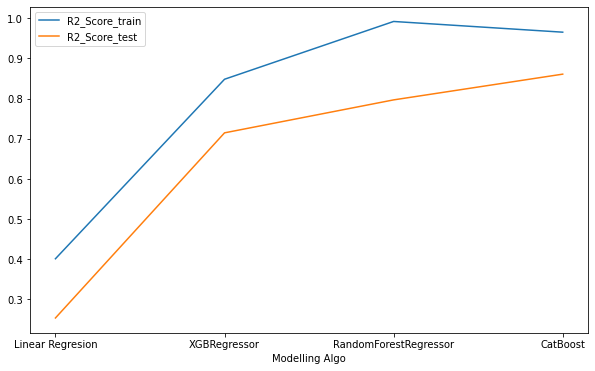

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))       
g1 =sns.lineplot(data=model1, x='Modelling Algo', y='R2_Score_train',label=None)
g1.set(ylabel=None)
g2 = sns.lineplot(data=model1, x='Modelling Algo', y='R2_Score_test',label=None)
g2.set(ylabel=None)
plt.legend(['R2_Score_train','R2_Score_test'])
plt.show()

### RMSE

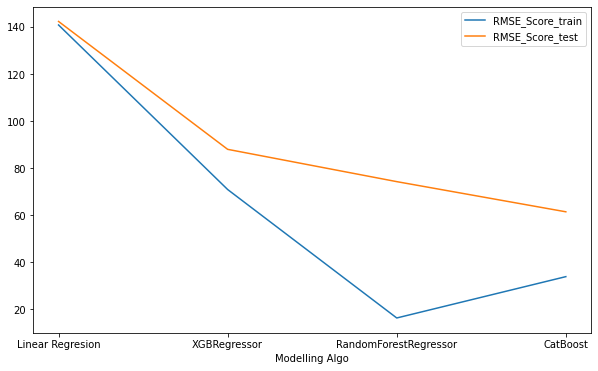

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))       
g1 = sns.lineplot(data=model1, x='Modelling Algo', y='RMSE_train')
g1.set(ylabel=None)
g2 = sns.lineplot(data=model1, x='Modelling Algo', y='RMSE_test')
g1.set(ylabel=None)
plt.legend(['RMSE_Score_train','RMSE_Score_test'])
plt.show()

### MAE

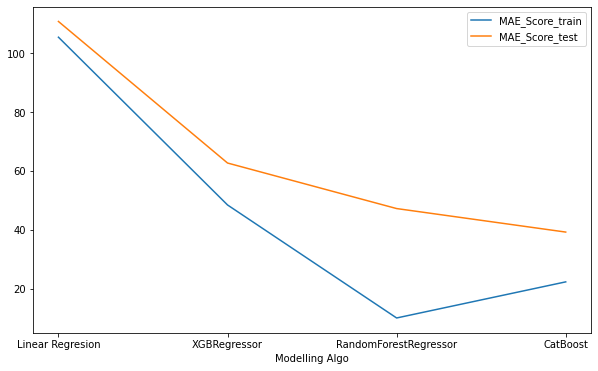

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))       
g1 = sns.lineplot(data=model1, x='Modelling Algo', y='MAE_Score_train')
g1.set(ylabel=None)
g2 = sns.lineplot(data=model1, x='Modelling Algo', y='MAE_Score_test')
g1.set(ylabel=None)
plt.legend(['MAE_Score_train','MAE_Score_test'])
plt.show()

Based on comparison for each model:
1. We see the base model (linear regression) has a very low r2 score and the highest rmse & mae score. So we conclude that linear regression is underfit and cannot be used for modeling
2. Random Forest algorithm has a quite large gap between model training and model testing. We conclude based on this gap that Random Forest is overfitting.
3. XGBoost algorithm and CatBoost has a similarity in performance. Both are less overfit than Random Forest.

We will use XGBoost and CatBoost in HyperParameter Tuning in order to achive better performance model.

#**05. Hyperparameter Tunning**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV


## XGBRegressor Hyperparameter tunning

#### XGB Parameter tunning

In [ ]:
param_grid = {"learning_rate"    : [0.10, 0.20, 0.30 ] ,
 "max_depth"        : [ 4, 6, 8, 10],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ], 
 "n_estimators"     : [200,500,1000,2000]}

### Cross Validation

In [ ]:
folds = KFold(n_splits = 5)

### XGB BayesianSearchCV

In [ ]:
XGB_bayes_search = BayesSearchCV(
    XGBRegressor(random_state=123),
    param_grid,
    cv=folds)

%time XGB_bayes_search.fit(X_train, y_train)

[00:07:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:07:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:08:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:08:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:08:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:08:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:08:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:08:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
XGB_bayes_search.best_params_

In [ ]:
XGB_bayes_search.best_estimator_

In [ ]:
XGB_best_bayes = XGB_bayes_search.best_estimator_

In [ ]:
XGB_best_bayes.fit(X_train, y_train)

XGB_bayes_y_pred = XGB_best_bayes.predict(X_test)
XGB_bayes_r2 = r2_score(y_test,XGB_bayes_y_pred )
XGB_bayes_RMSE = np.sqrt(mean_squared_error(y_test,XGB_bayes_y_pred))
XGB_bayes_MAE = mean_absolute_error(y_test,XGB_bayes_y_pred) 

In [ ]:
print('R-squared XGB_bayes :',XGB_bayes_r2)
print('RMSE XGB_bayes :',XGB_bayes_RMSE)
print('MAE XGB_bayes :', XGB_bayes_MAE)

## CatBoost Regressor Hyperparameter Tunning

In [ ]:
param_bayes_cat= {  'depth'         : [4,6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1, 0.2, 0.3],
                  'iterations'    : [150, 200, 250, 300],
                  'l2_leaf_reg'   : [None, 1.0, 5.5, 0.5]
                 }

### CatBoost Bayesian Search CV

In [ ]:
cat_bayes_search = BayesSearchCV(
    CatBoostRegressor(random_state=123),
    param_bayes_cat,
    cv=folds
)

%time cat_bayes_search.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
152:	learn: 19.9484000	total: 758ms	remaining: 728ms
153:	learn: 19.9136620	total: 763ms	remaining: 724ms
154:	learn: 19.8510710	total: 768ms	remaining: 718ms
155:	learn: 19.6967592	total: 773ms	remaining: 713ms
156:	learn: 19.5627285	total: 777ms	remaining: 708ms
157:	learn: 19.4818310	total: 782ms	remaining: 703ms
158:	learn: 19.3640251	total: 787ms	remaining: 698ms
159:	learn: 19.2529604	total: 792ms	remaining: 693ms
160:	learn: 19.1862448	total: 797ms	remaining: 688ms
161:	learn: 19.0541787	total: 801ms	remaining: 683ms
162:	learn: 18.9843712	total: 806ms	remaining: 678ms
163:	learn: 18.8592047	total: 811ms	remaining: 672ms
164:	learn: 18.7640170	total: 816ms	remaining: 667ms
165:	learn: 18.6377461	total: 822ms	remaining: 663ms
166:	learn: 18.4972122	total: 835ms	remaining: 665ms
167:	learn: 18.4276228	total: 839ms	remaining: 659ms
168:	learn: 18.3893893	total: 844ms	remaining: 654ms
169:	learn: 18.3369412	total: 849ms	remaining: 6

BayesSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
              error_score='raise',
              estimator=<catboost.core.CatBoostRegressor object at 0x7f85aec0d290>,
              fit_params=None, iid=True, n_iter=50, n_jobs=1, n_points=1,
              optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
              refit=True, return_train_score=False, scoring=None,
              search_spaces={'depth': [4, 6, 8, 10],
                             'iterations': [150, 200, 250, 300],
                             'l2_leaf_reg': [None, 1.0, 5.5, 0.5],
                             'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]},
              verbose=0)

In [ ]:
cat_bayes_search.best_params_

OrderedDict([('depth', 10),
             ('iterations', 300),
             ('l2_leaf_reg', 1.0),
             ('learning_rate', 0.1)])

In [ ]:
cat_bayes_search.best_estimator_

In [ ]:
cat_best_bayes_search = cat_bayes_search.best_estimator_

In [ ]:
cat_best_bayes_search.fit(X_train, y_train)

y_pred_cat = cat_best_bayes_search.predict(X_test)
cat_bayes_r2 = r2_score(y_test,y_pred_cat)
cat_bayes_RMSE = np.sqrt(mean_squared_error(y_test,y_pred_cat))
cat_bayes_MAE = mean_absolute_error(y_test,y_pred_cat)

0:	learn: 169.8267244	total: 10.8ms	remaining: 3.24s
1:	learn: 156.5169845	total: 18.4ms	remaining: 2.74s
2:	learn: 145.3936185	total: 25.9ms	remaining: 2.56s
3:	learn: 136.2110593	total: 33.3ms	remaining: 2.47s
4:	learn: 126.9039525	total: 40.9ms	remaining: 2.42s
5:	learn: 118.5664188	total: 48.5ms	remaining: 2.38s
6:	learn: 111.1504324	total: 56.1ms	remaining: 2.35s
7:	learn: 105.5434839	total: 64.8ms	remaining: 2.37s
8:	learn: 98.9129331	total: 72.8ms	remaining: 2.35s
9:	learn: 94.2857011	total: 80.5ms	remaining: 2.33s
10:	learn: 89.1290687	total: 87.9ms	remaining: 2.31s
11:	learn: 84.2936782	total: 95.4ms	remaining: 2.29s
12:	learn: 80.5961919	total: 103ms	remaining: 2.27s
13:	learn: 77.3975426	total: 111ms	remaining: 2.26s
14:	learn: 74.5304189	total: 120ms	remaining: 2.28s
15:	learn: 71.2266707	total: 127ms	remaining: 2.26s
16:	learn: 68.7017959	total: 135ms	remaining: 2.25s
17:	learn: 66.2740238	total: 143ms	remaining: 2.24s
18:	learn: 63.7884696	total: 151ms	remaining: 2.23s
19

In [ ]:
print('R-squared cat_bayes :',cat_bayes_r2)
print('RMSE cat_bayes:',cat_bayes_RMSE )
print('MAE cat_bayes: ',cat_bayes_MAE)

R-squared cat_bayes : 0.9526371682214799
RMSE cat_bayes: 39.250631594535626
MAE cat_bayes:  24.550392141768896


#**06. Evaluation**

In [ ]:
model_reg = [cat_best_bayes_search, XGB_best_bayes]
model_eval = ['CatBoost','XGB']

NameError: ignored

In [ ]:
MAE = []
RMSE = []
Prediction = []

for model in range (len(model_reg)):
    reg=model_reg[model]
    reg.fit(X_train,y_train)

    #obtaining scoring for training
    y_pred=reg.predict(bike_testing.drop(columns=['count']))
    Prediction.append(y_pred)
    RMSE.append(np.sqrt(mean_squared_error(bike_testing['count'],y_pred)))
    MAE.append(mean_absolute_error(bike_testing['count'],y_pred))

In [ ]:
g = {'Modelling Algo':model_eval,'RMSE':RMSE,'MAE':MAE,}
result = pd.DataFrame(g)
result